## ROC Plot ##

In [1]:
# Import required modules
import sys
from pathlib import Path

In [2]:
# import project root into modules
project_root = str(Path.cwd().resolve().parent)
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from src.analysis import roc_plot
from src.analysis.efficiency_analysis import load_preprocessed_jobs_dataframe_from_duckdb
from src.config import enum_constants

# Automatically reload modules before executing code
%load_ext autoreload
# Reload all modules imported with %aimport every time before executing the Python code typed.
%autoreload 1
%aimport src.analysis.roc_plot, src.config.enum_constants

In [4]:
# load jobs df
loaded_df = load_preprocessed_jobs_dataframe_from_duckdb(db_path="../data/slurm_data.db")

Connected to ../data/slurm_data.db
Disconnected from ../data/slurm_data.db


In [5]:
# initilize the ROCVisualizer instance
roc_instance = roc_plot.ROCVisualizer(jobs_df=loaded_df)
print(roc_instance.jobs_with_efficiency_metrics["vram_constraint_efficiency"].max())
roc_instance.jobs_with_efficiency_metrics["vram_constraint_efficiency"] = roc_instance.jobs_with_efficiency_metrics[
    "vram_constraint_efficiency"
].clip(upper=1)

/opt/anaconda3/envs/ds4cg_unity/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


6.078776041666667


### Threshold: alloc_vram_efficiency ###

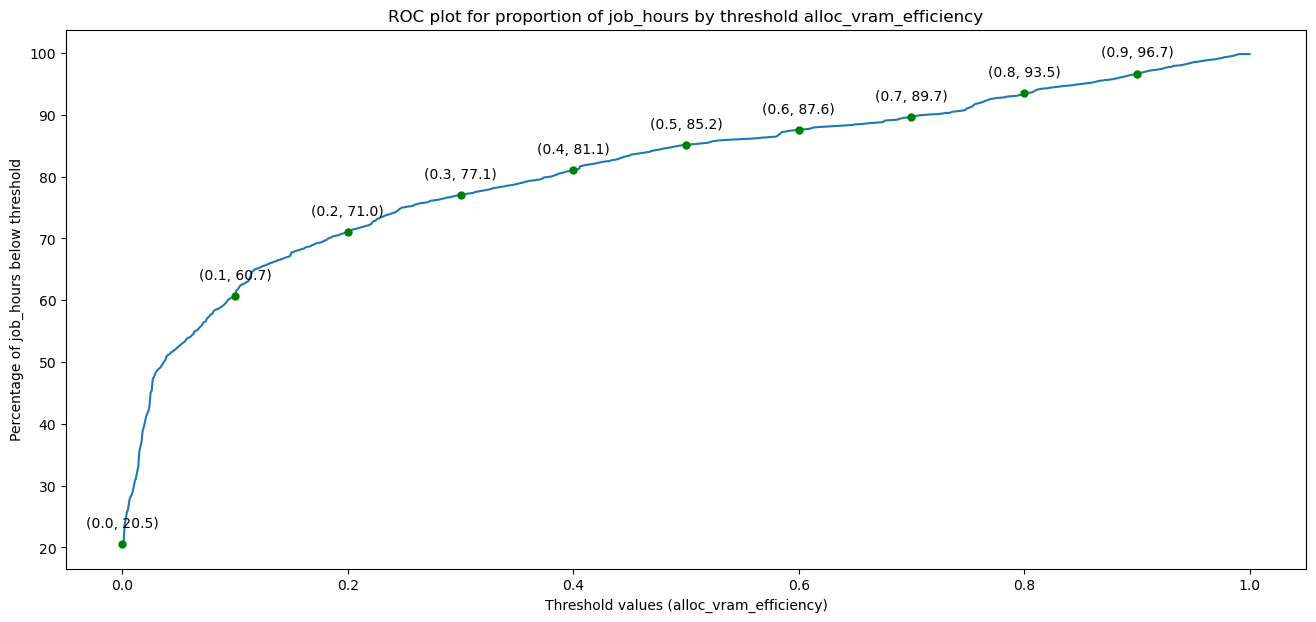

In [6]:
# roc_instance = roc_plot.ROCVisualizer(db_path="../data/slurm_data.db")
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOB_HOURS
fig, (axe1) = roc_instance.plot_roc(
    max_threshold=1.0, threshold_step=0.001, threshold_metric=threshold_metric, proportion_metric=proportion_metric
)

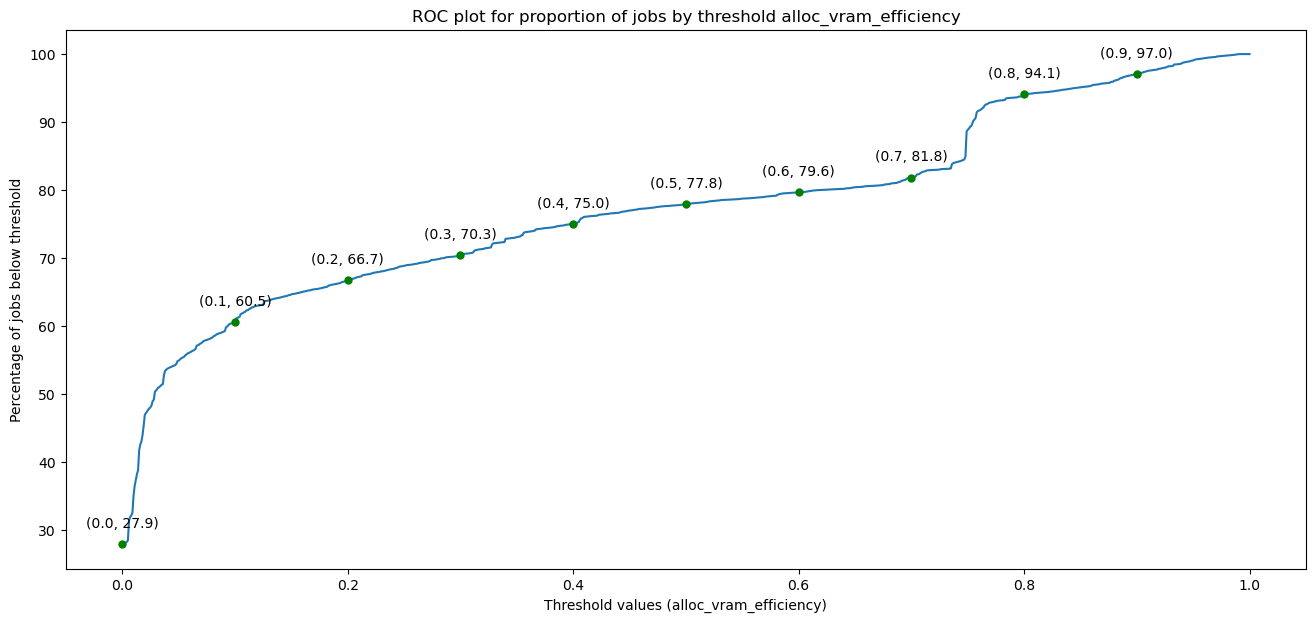

In [7]:
# plot number of jobs by percentage with regard to alloc_vram_effificient
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc(
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=True,
)

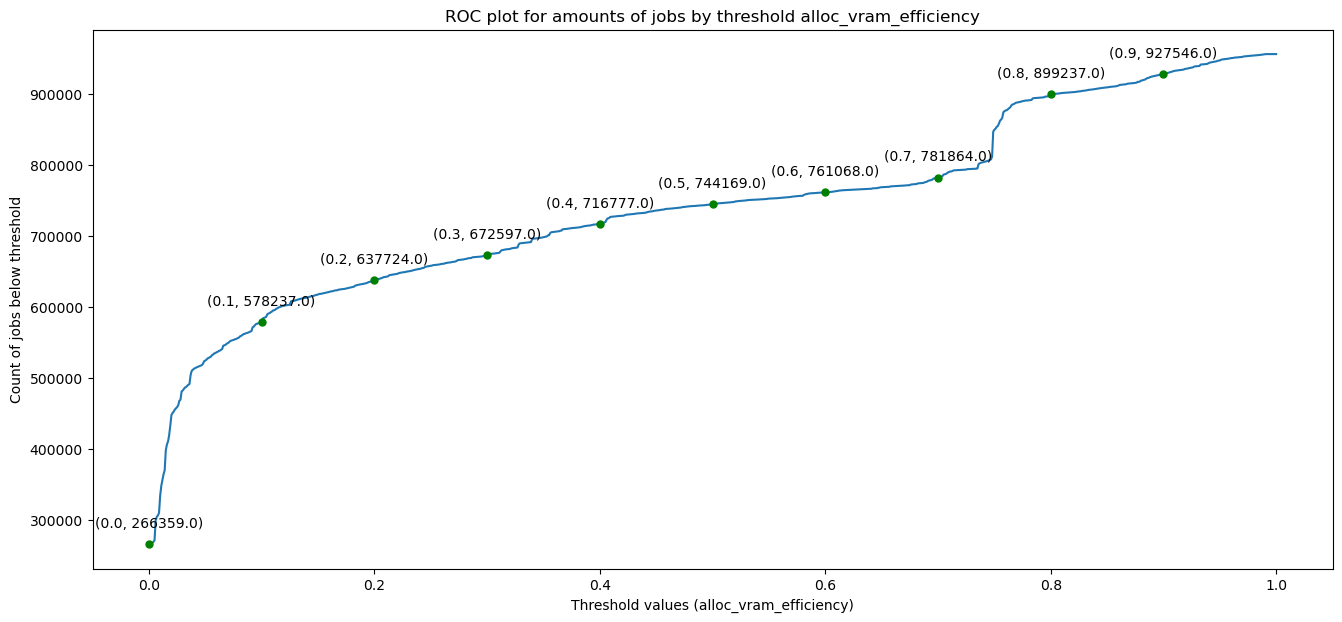

In [8]:
# plot raw numbers of jobs
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc(
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False,
)

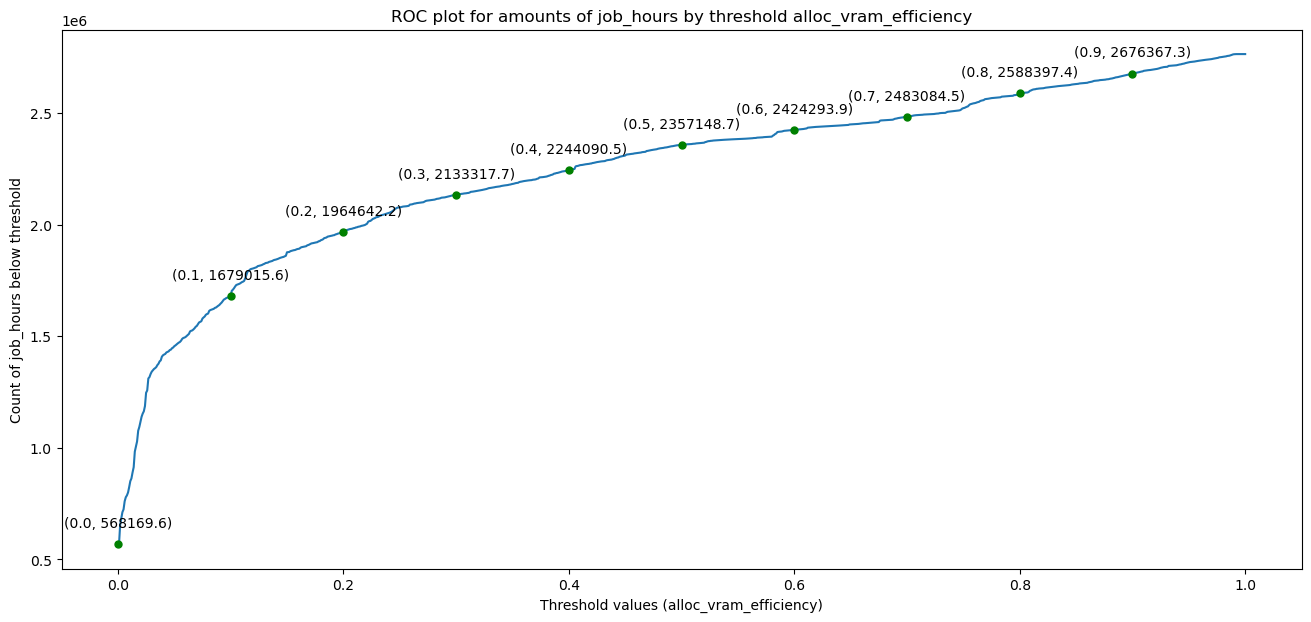

In [9]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOB_HOURS
fig, (axe1) = roc_instance.plot_roc(
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False,
)

### Threshold : vram_constraints_efficiency ###

Amount of entries whose vram_constraint_efficiency is null: 748843


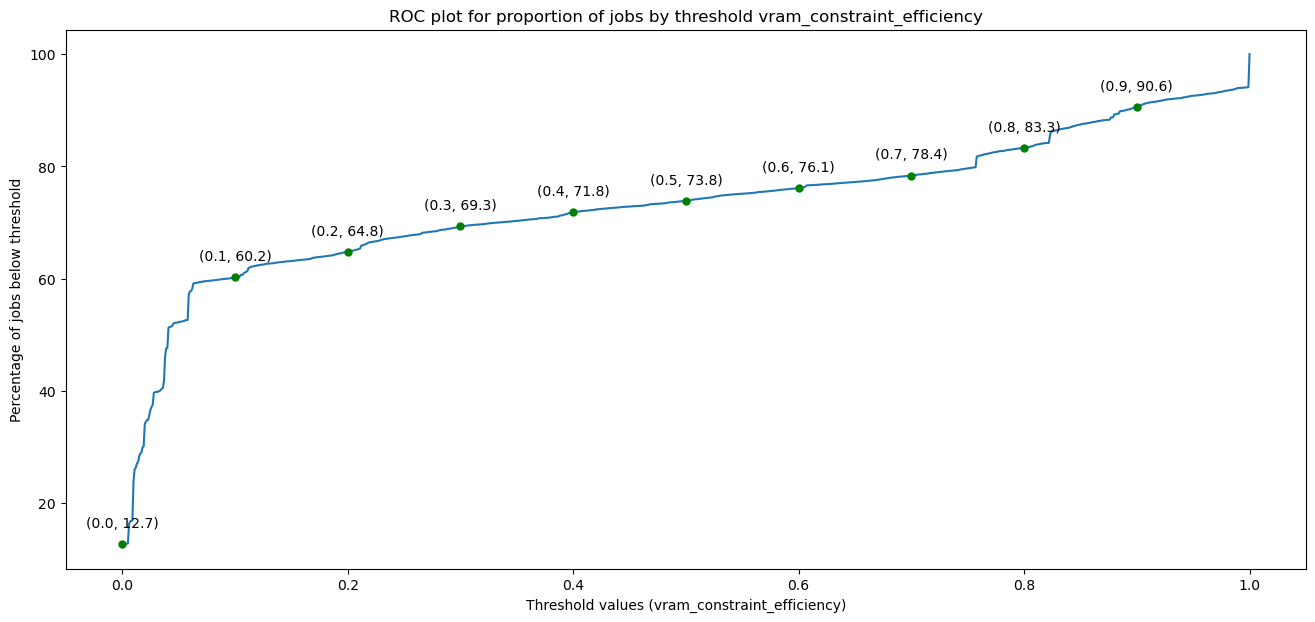

In [10]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc(
    max_threshold=1.0, threshold_step=0.001, threshold_metric=threshold_metric, proportion_metric=proportion_metric
)

Amount of entries whose vram_constraint_efficiency is null: 748843


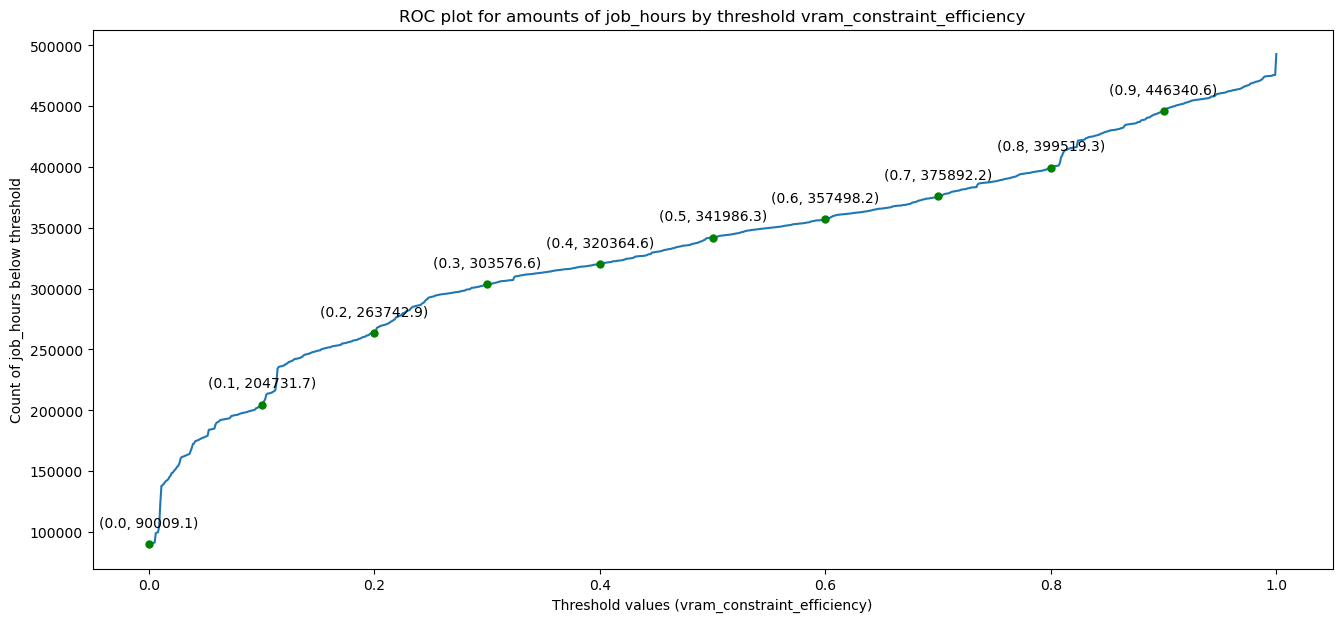

In [12]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.JOB_HOURS
fig, (axe1) = roc_instance.plot_roc(
    max_threshold=1.0,
    threshold_step=0.001,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False,
)

### Threshold : alloc_vram_efficiency_score ###

In [13]:
# # roc_instance = roc_plot.ROCVisualizer(db_path="../data/slurm_data.db")
# roc_instance = roc_plot.ROCVisualizer(db_path="../data/slurm_data.db")


Amount of entries whose alloc_vram_efficiency_score is -inf : 266359


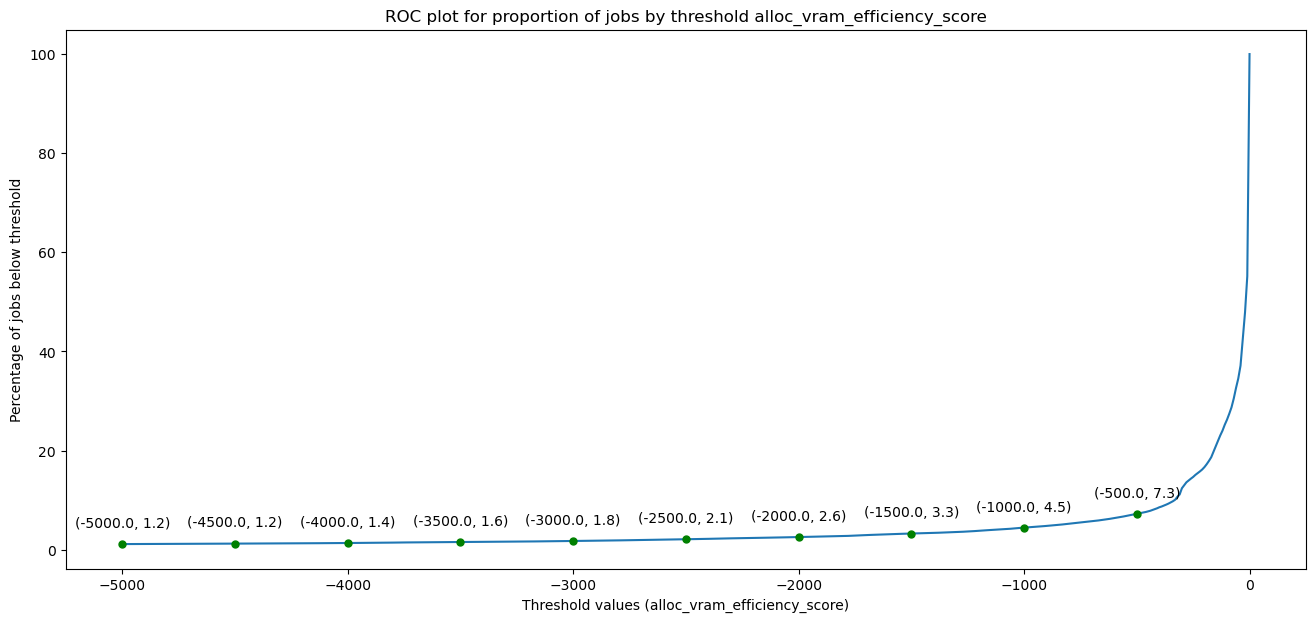

In [11]:
# for alloc_vram_efficiency_score, we need to adjust the min_threshold manually

threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.JOBS
fig, (axe1) = roc_instance.plot_roc(
    max_threshold=0.0,
    threshold_step=10,
    min_threshold=-5000.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
)

Amount of entries whose alloc_vram_efficiency_score is -inf : 266359


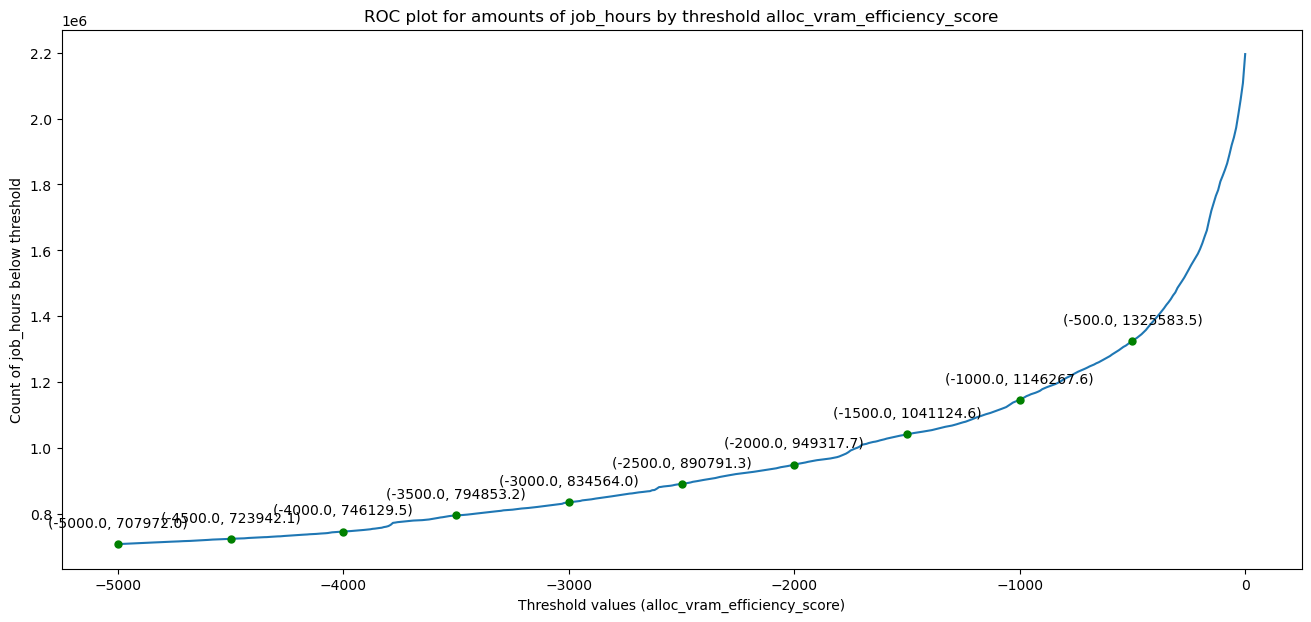

In [15]:
# for alloc_vram_efficiency_score, we need to adjust the min_threshold manually

# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.JOB_HOURS
fig, (axe1) = roc_instance.plot_roc(
    min_threshold=-5000,
    max_threshold=0.0,
    threshold_step=10,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False,
)

### Proportion metric : User ###

In [16]:
null_alloc_vram_efficiency_score = roc_instance.jobs_with_efficiency_metrics[
    roc_instance.jobs_with_efficiency_metrics["alloc_vram_efficiency"].isna()
]

print(
    null_alloc_vram_efficiency_score[
        ["used_vram_gib", "allocated_vram", "alloc_vram_efficiency", "Partition", "GPUType"]
    ]
)

Empty DataFrame
Columns: [used_vram_gib, allocated_vram, alloc_vram_efficiency, Partition, GPUType]
Index: []


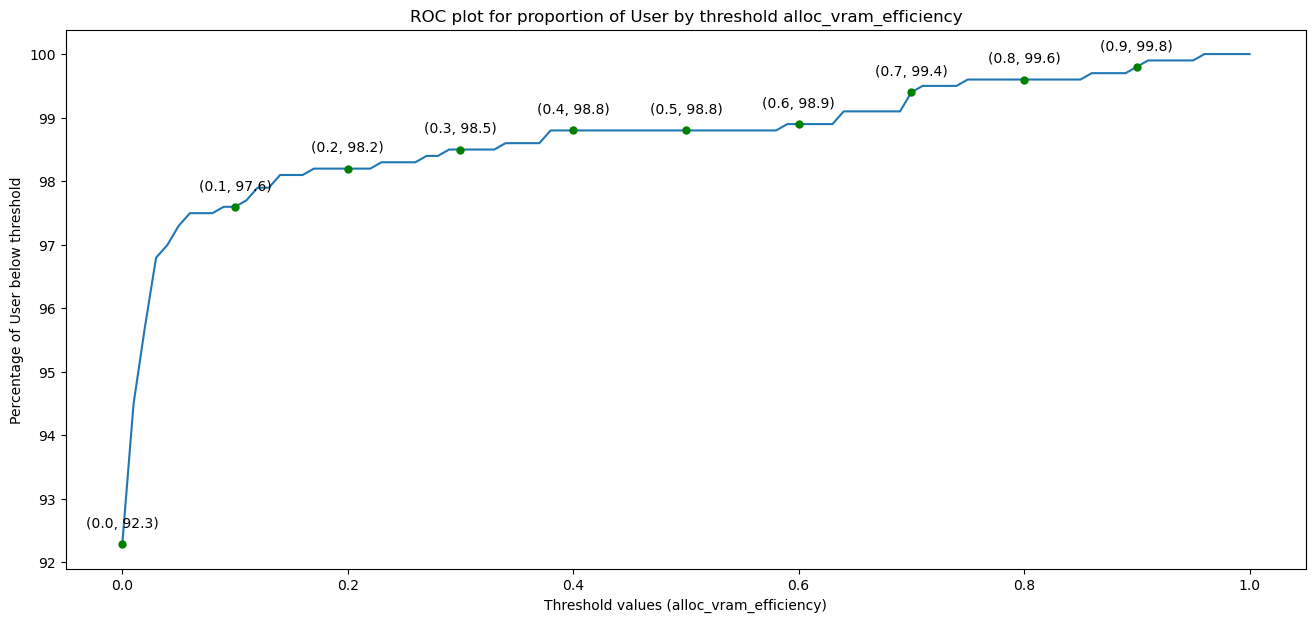

In [17]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.USER
fig, (axe1) = roc_instance.plot_roc(
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=True,
)

In [18]:
user_with_all_vram_score_null = (
    roc_instance.jobs_with_efficiency_metrics.groupby("User")["vram_constraint_efficiency"]
    .apply(lambda x: x.isnull().all())
    .sum()
)
user_with_all_vram_score_null

np.int64(537)

Amount of entries whose vram_constraint_efficiency is null: 748843


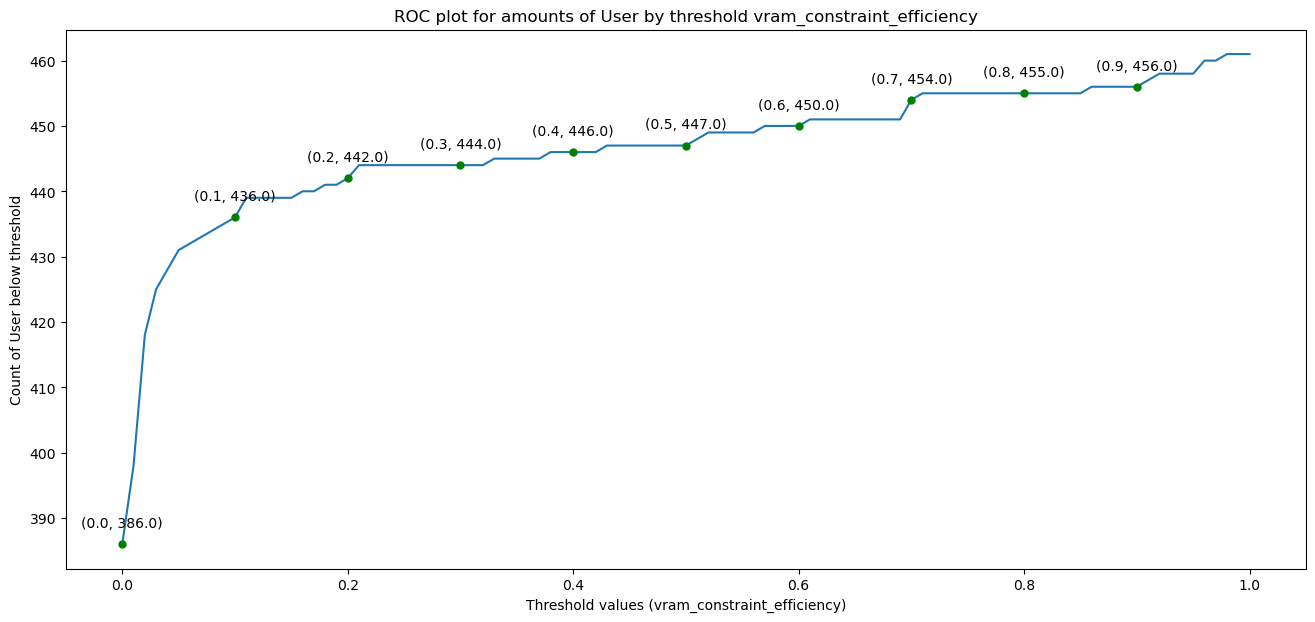

In [19]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.USER
fig, (axe1) = roc_instance.plot_roc(
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False,
)

Amount of entries whose alloc_vram_efficiency_score is -inf : 266359
Setting min_threshold to -13304603.139441624 based on data.


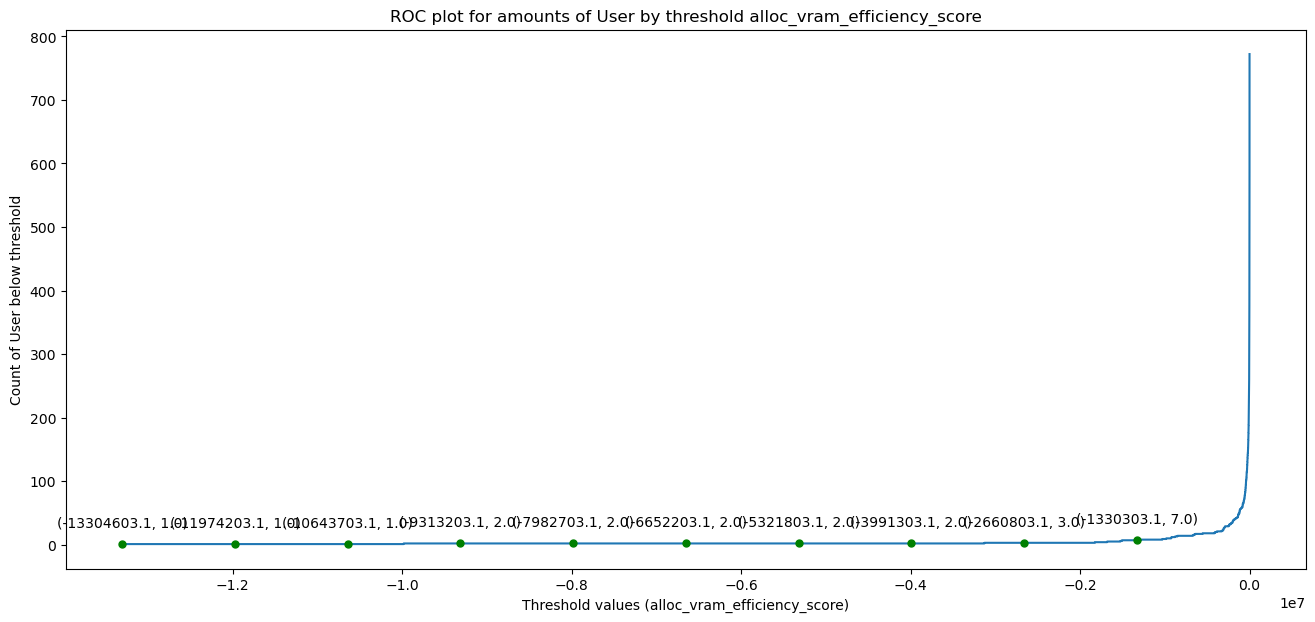

In [20]:
# plot raw number of job_hours
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.USER
fig, (axe1) = roc_instance.plot_roc(
    max_threshold=0.0,
    threshold_step=100,
    # min_threshold=-5000.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False,
)

### Proportion Metrics: PI_GROUP ###

[autoreload of src.analysis.roc_plot failed: Traceback (most recent call last):
  File "/opt/anaconda3/envs/ds4cg_unity/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 283, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/envs/ds4cg_unity/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 483, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/ds4cg_unity/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/roc_plot.py", line 22, in <module>
    from src.config.enum_constants import ProportionMetricsEnum, JobEfficiencyMetricsEnum
Im

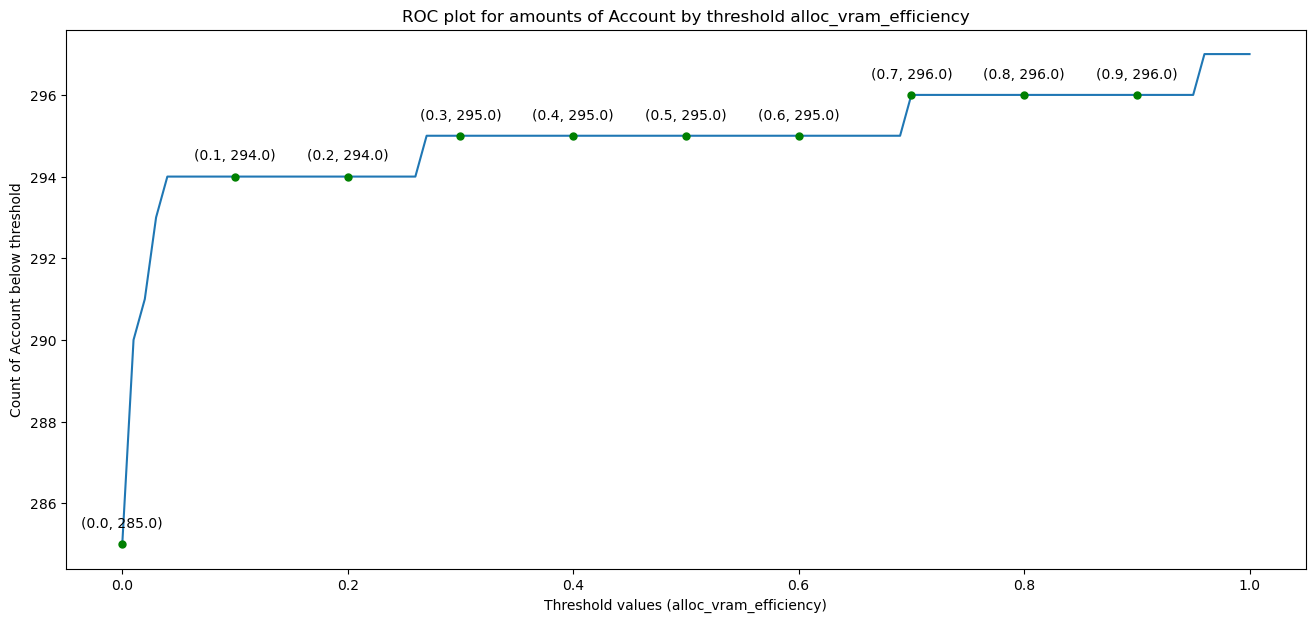

In [21]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.PI_GROUP
fig, (axe1) = roc_instance.plot_roc(
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False,
)

In [22]:
temp = (
    roc_instance.jobs_with_efficiency_metrics.groupby("Account", observed=True)["vram_constraint_efficiency"]
    .apply(lambda x: x.isnull().all())
    .sum()
)
temp

np.int64(139)

Amount of entries whose vram_constraint_efficiency is null: 748843
[136, 142, 147, 148, 149, 150, 150, 150, 150, 151, 152, 152, 152, 152, 152, 152, 152, 152, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 153, 154, 154, 154, 154, 154, 154, 154, 154, 154, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 156, 156, 156, 156, 156, 156, 156, 156, 156, 156, 156, 156, 156, 156, 156, 156, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 158, 158, 158, 158, 158]


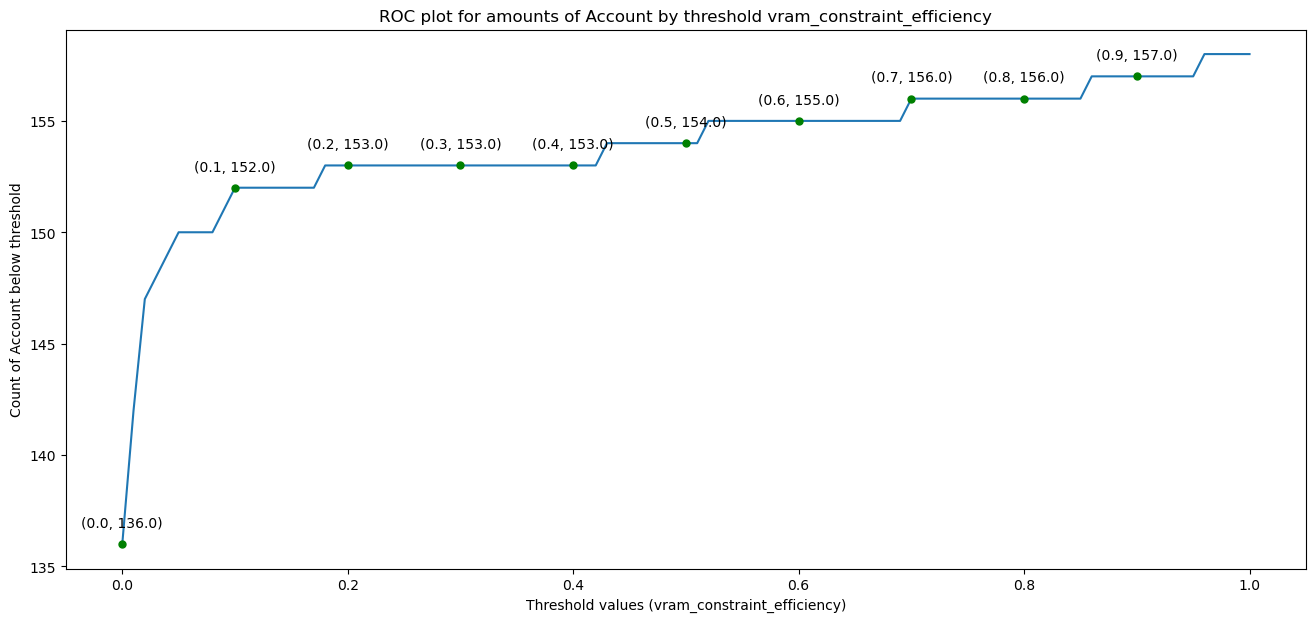

In [27]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.PI_GROUP
fig, (axe1) = roc_instance.plot_roc(
    min_threshold=0.0,
    threshold_step=0.01,
    max_threshold=1.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False,
)

Amount of entries whose alloc_vram_efficiency_score is -inf : 266359
Setting min_threshold to -13304603.139441624 based on data.
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

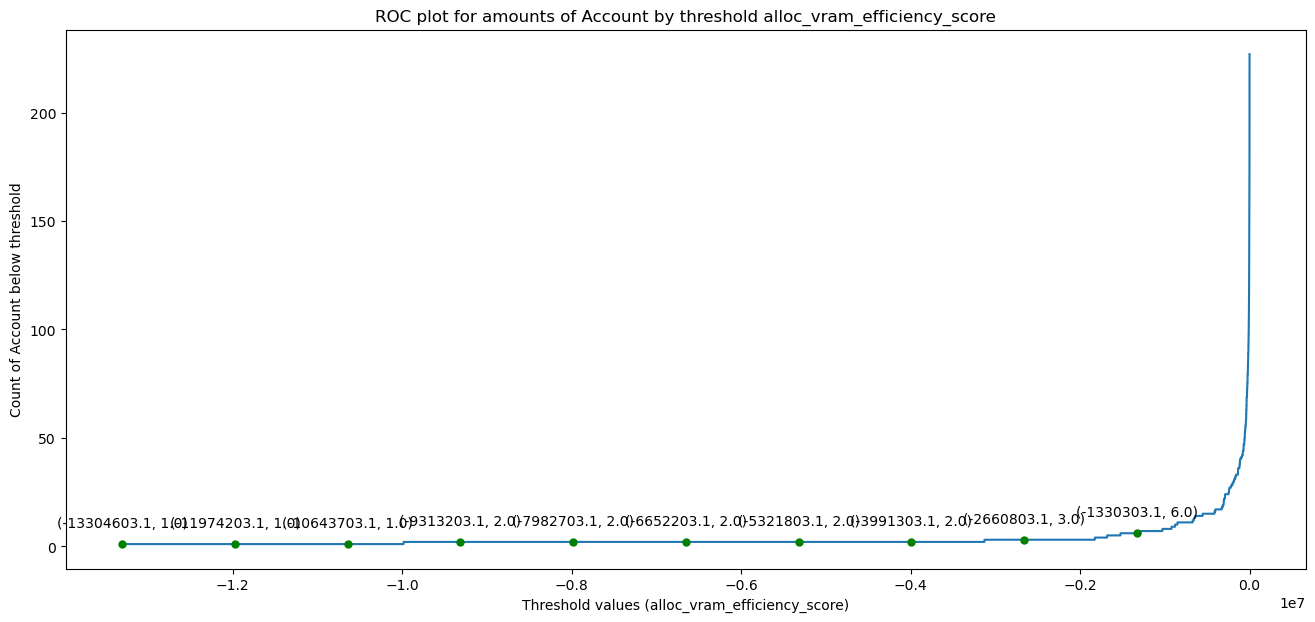

In [28]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.PI_GROUP
fig, (axe1) = roc_instance.plot_roc(
    max_threshold=0.0,
    threshold_step=100,
    # min_threshold=-5000.0,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False,
)

### Proportion Metrics: VRAM_HOURS ###

Amount of entries whose vram_constraint_efficiency is null: 748843


(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ROC plot for amounts of vram_hours by threshold vram_constraint_efficiency'}, xlabel='Threshold values (vram_constraint_efficiency)', ylabel='Count of vram_hours below threshold'>])

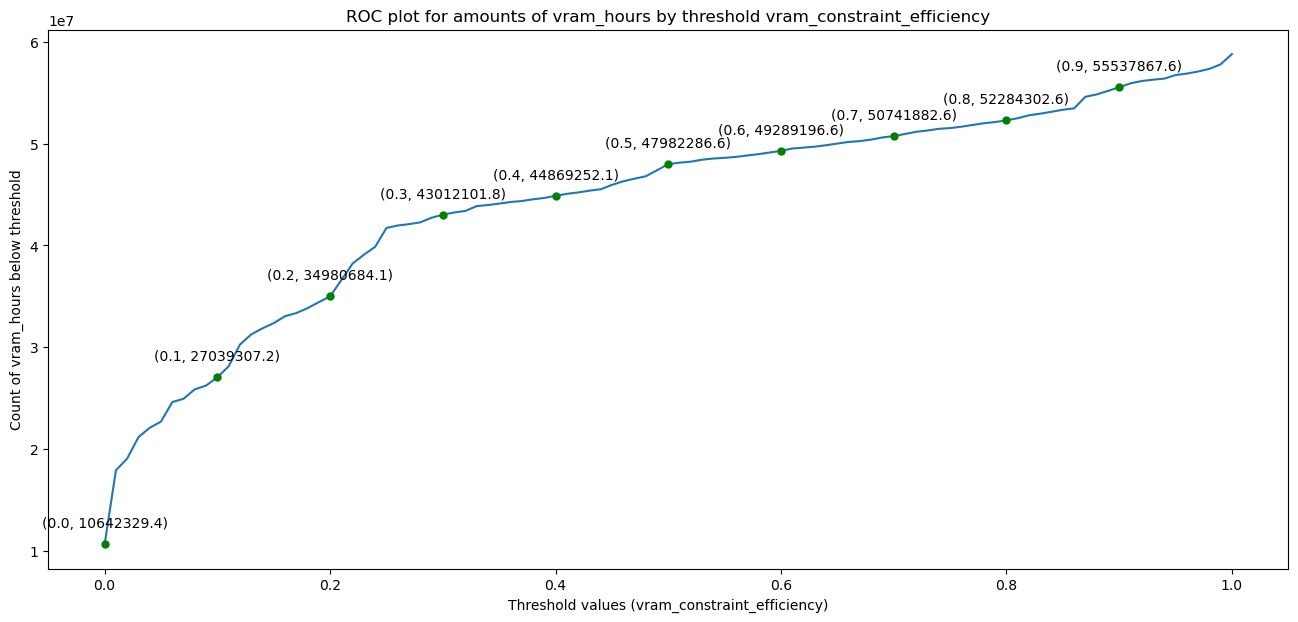

In [41]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.VRAM_HOURS

roc_instance.plot_roc(
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.01,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False
)


(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ROC plot for amounts of vram_hours by threshold alloc_vram_efficiency'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Count of vram_hours below threshold'>])

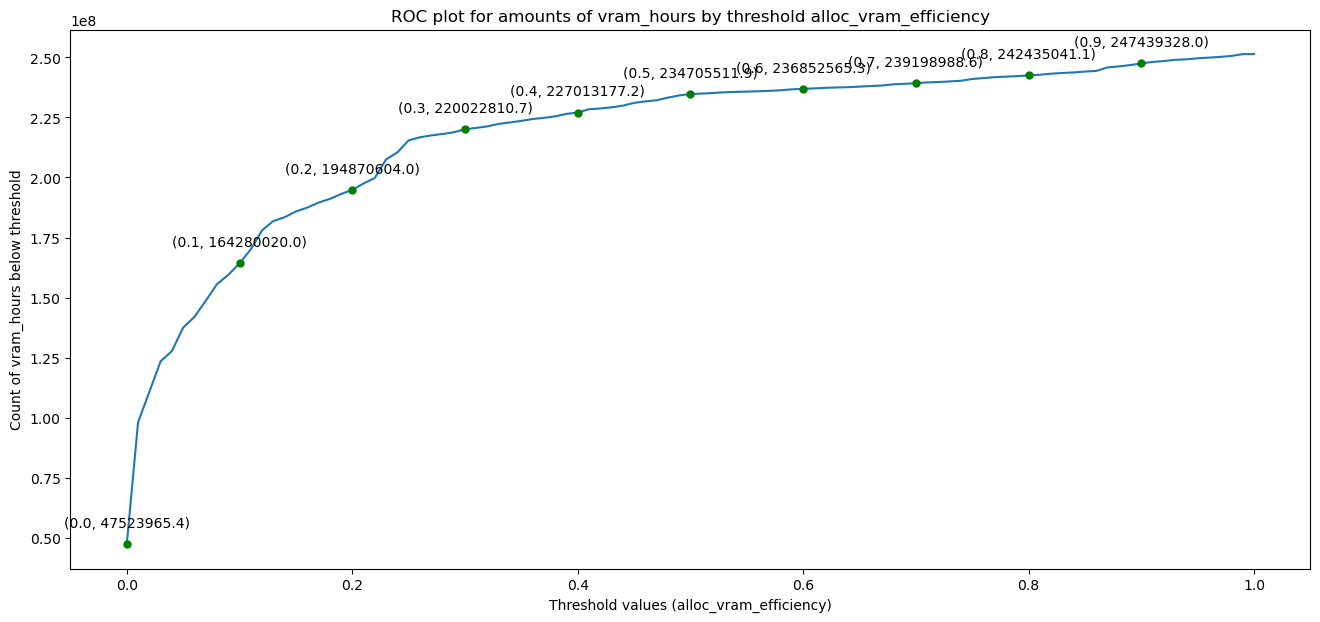

In [42]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.VRAM_HOURS

roc_instance.plot_roc(
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.01,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False
)


Amount of entries whose alloc_vram_efficiency_score is -inf : 266359


(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ROC plot for amounts of vram_hours by threshold alloc_vram_efficiency_score'}, xlabel='Threshold values (alloc_vram_efficiency_score)', ylabel='Count of vram_hours below threshold'>])

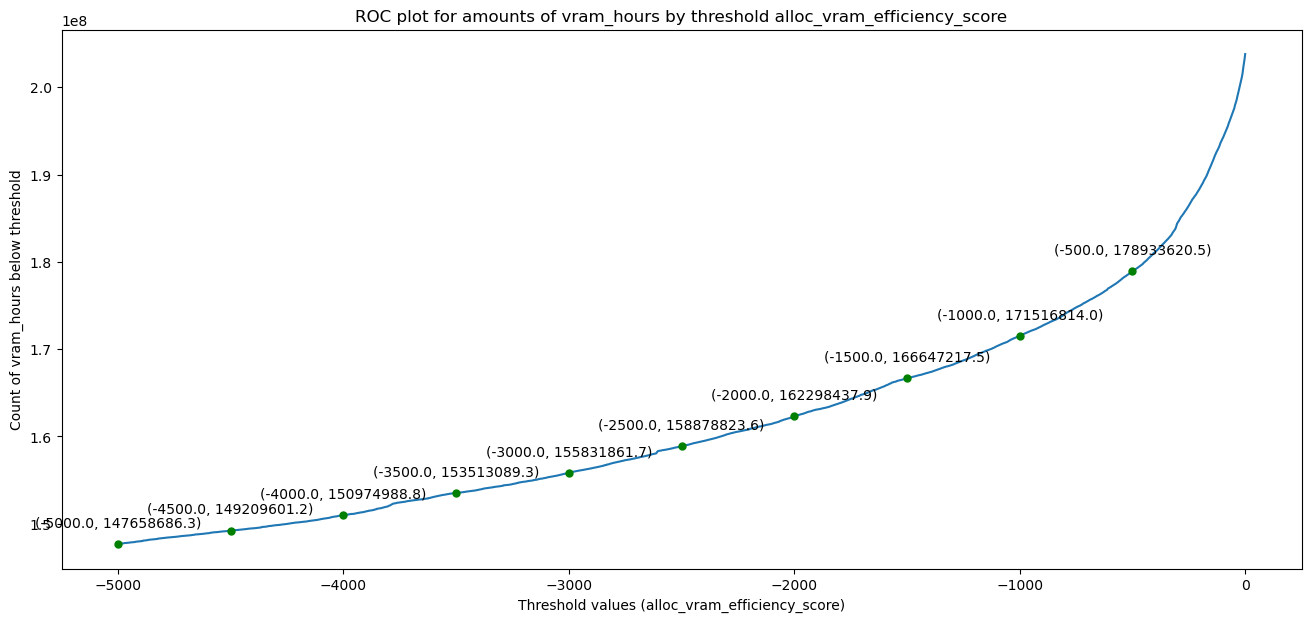

In [51]:
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.VRAM_HOURS

roc_instance.plot_roc(
    max_threshold=0.0,
    min_threshold=-5000.0,
    threshold_step=1,
    threshold_metric=threshold_metric,
    proportion_metric=proportion_metric,
    plot_percentage=False
)


## Multiple line plot by user ###

#### Inspect 6 users who submitted the highest number of jobs ####

In [29]:
top_user_with_job_count = (
    roc_instance.jobs_with_efficiency_metrics.groupby("User")
    .agg(job_count=("JobID", "count"), user_job_hours=("job_hours", "sum"))
    .reset_index()
    .sort_values(by="job_count")
    .tail(6)
)
print(top_user_with_job_count)

                     User  job_count  user_job_hours
722    rvmathew_umass_edu      39595   126900.296389
639      pchien_umass_edu      44266    26572.920278
929   xinchenhe_umass_edu      47075     3253.259167
227   dosterman_umass_edu      52255     6322.638611
941     yc85_illinois_edu      65401     3145.866667
232  dshivashok_umass_edu      77145    21529.127778


[np.int64(8707), np.int64(8707), np.int64(8707), np.int64(8707), np.int64(8707), np.int64(8707), np.int64(27516), np.int64(27518), np.int64(27521), np.int64(27521), np.int64(27539), np.int64(28126), np.int64(29694), np.int64(29728), np.int64(29745), np.int64(29859), np.int64(36250), np.int64(38131), np.int64(39025), np.int64(39037), np.int64(39095), np.int64(39305), np.int64(39463), np.int64(39471), np.int64(39502), np.int64(39520), np.int64(39525), np.int64(39525), np.int64(39532), np.int64(39549), np.int64(39577), np.int64(39585), np.int64(39586), np.int64(39586), np.int64(39590), np.int64(39594), np.int64(39594), np.int64(39594), np.int64(39594), np.int64(39594), np.int64(39594), np.int64(39594), np.int64(39594), np.int64(39594), np.int64(39594), np.int64(39595), np.int64(39595), np.int64(39595), np.int64(39595), np.int64(39595), np.int64(39595), np.int64(39595), np.int64(39595), np.int64(39595), np.int64(39595), np.int64(39595), np.int64(39595), np.int64(39595), np.int64(39595), np

(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of jobs by threshold alloc_vram_efficiency'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Count of jobs below threshold'>])

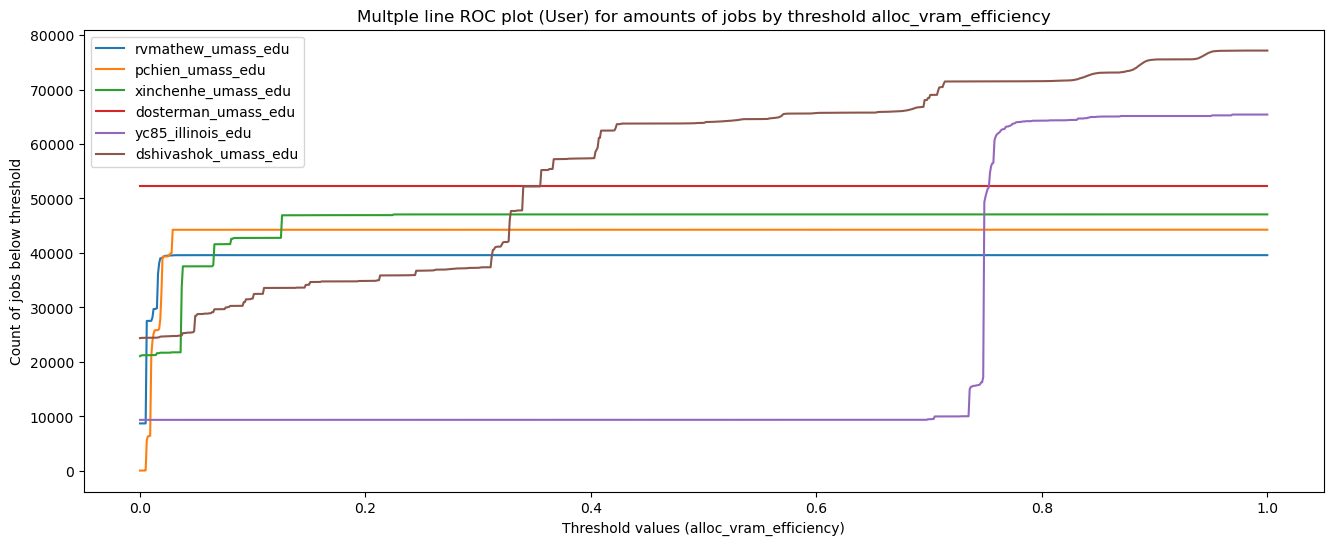

In [30]:
from src.config.enum_constants import ProportionMetricsEnum, JobEfficiencyMetricsEnum

roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_user_with_job_count["User"].to_numpy()),
    object_column_type=ProportionMetricsEnum.USER,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY,
    proportion_metric=ProportionMetricsEnum.JOBS,
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    plot_percentage=False,
)

Amount of entries whose alloc_vram_efficiency_score is -inf : 266359
[np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(107), np.int64(108), np.int64(108), np.int64(108), np.int64(108), np.int64(108), np.int64(108), np.int64(108), np.int64(109), np.int64(109), np.int64(109), np.int64(109), np.int64(109), np.int64(109), np.int64(109), np.int64(110), np.int64(110), np.int64(110), np.int64(110), np.int64(110), np.int64(110), 

(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of jobs by threshold alloc_vram_efficiency_score'}, xlabel='Threshold values (alloc_vram_efficiency_score)', ylabel='Count of jobs below threshold'>])

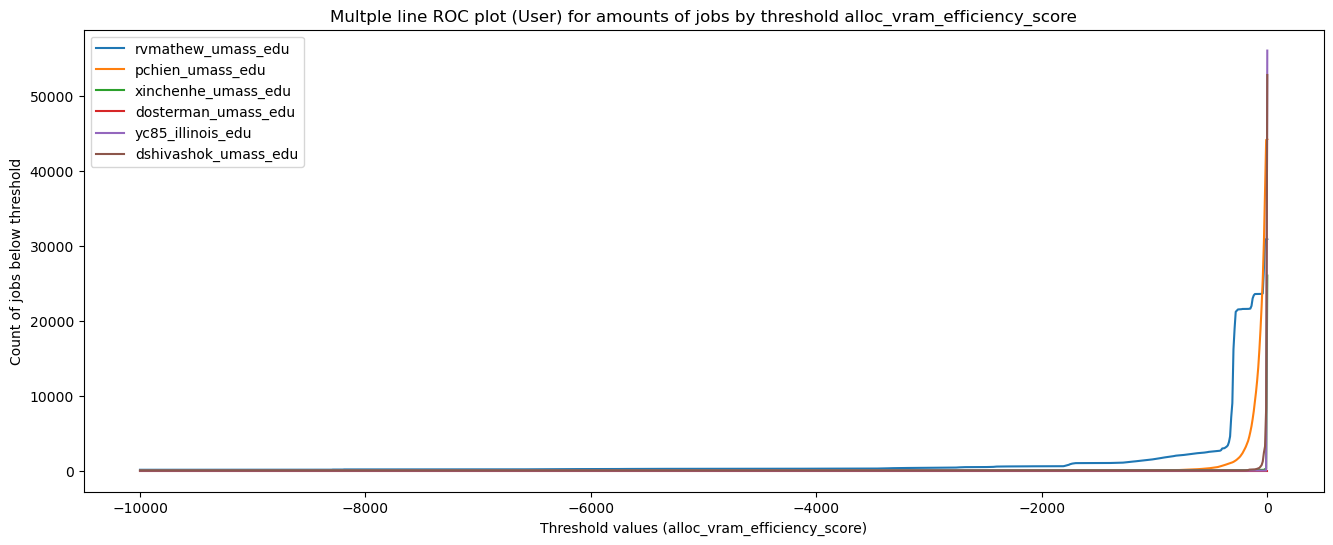

In [31]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_user_with_job_count["User"].to_numpy()),
    object_column_type=ProportionMetricsEnum.USER,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE,
    proportion_metric=ProportionMetricsEnum.JOBS,
    min_threshold=-10000,
    max_threshold=0.0,
    threshold_step=10,
    plot_percentage=False,
)

Amount of entries whose vram_constraint_efficiency is null: 748843
[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(

(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of jobs by threshold vram_constraint_efficiency'}, xlabel='Threshold values (vram_constraint_efficiency)', ylabel='Count of jobs below threshold'>])

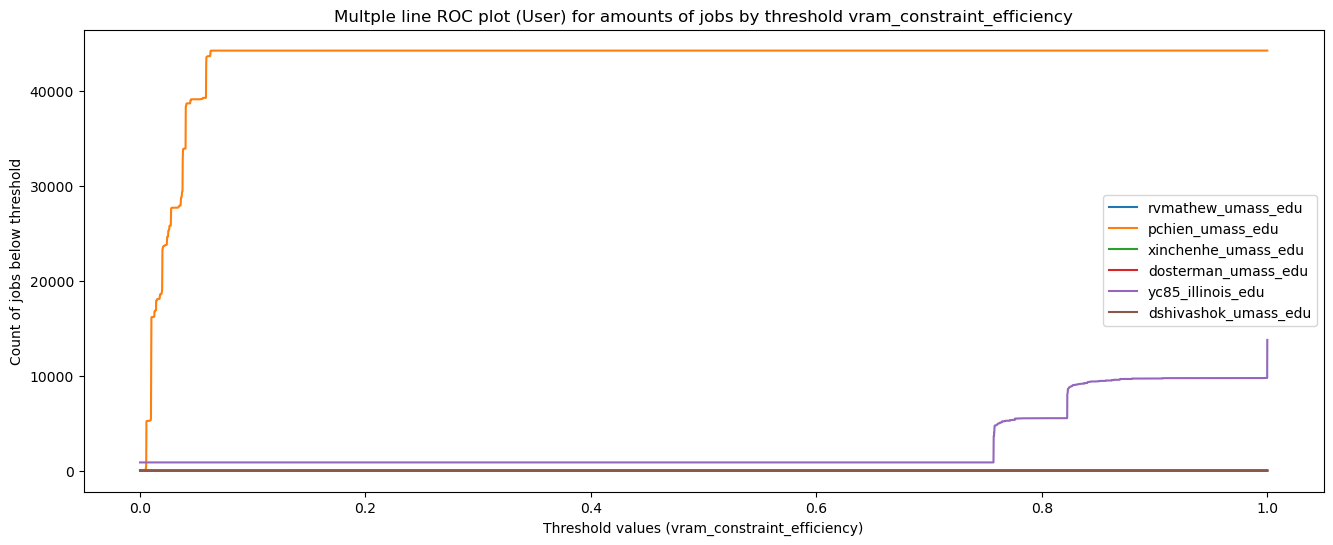

In [32]:
from src.config.enum_constants import ProportionMetricsEnum, JobEfficiencyMetricsEnum

roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_user_with_job_count["User"].to_numpy()),
    # plot_object_list=['dosterman_umass_edu'],
    object_column_type=ProportionMetricsEnum.USER,
    threshold_metric=JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY,
    plot_percentage=False,
    max_threshold=1.0,
    min_threshold=0.0,
    threshold_step=0.0001,
)

In [33]:
# Inspect an outliner
cur_df = roc_instance.jobs_with_efficiency_metrics.copy()
filtered = cur_df[cur_df["User"] == "dosterman_umass_edu"].copy()
group = (
    filtered.groupby("User")
    .agg(
        job_count=("JobID", "count"),
        job_hours=("job_hours", "sum"),
        vram_efficiency_score=(JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY.value, "sum"),
        allocated_vram=("allocated_vram", "sum"),
        used_vram=("used_vram_gib", "sum"),
    )
    .reset_index()
)
print(group)

                  User  job_count    job_hours  vram_efficiency_score  \
0  dosterman_umass_edu      52255  6322.638611                    0.0   

   allocated_vram  used_vram  
0          728347        0.0  


#### Inspect the 6 users with highest number of job_hours ####

In [34]:
top_user_by_job_hour = (
    roc_instance.jobs_with_efficiency_metrics.groupby("User")
    .agg(job_count=("JobID", "count"), job_hours=("job_hours", "sum"))
    .reset_index()
    .sort_values(by="job_hours")
    .tail(6)
)
print(top_user_by_job_hour)

                      User  job_count      job_hours
28   achyut_subedi_uri_edu        581   65209.609722
980         zhangl_uri_edu        771  106335.137222
7       aaronsun_umass_edu       8255  107418.811944
760   shanlongli_umass_edu      36129  111877.437222
722     rvmathew_umass_edu      39595  126900.296389
286        gkhanna_uri_edu       3885  167379.417222


Amount of entries whose vram_constraint_efficiency is null: 748843
[np.float64(0.0), np.float64(0.0), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889), np.float64(384.0288888888889),

(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of job_hours by threshold vram_constraint_efficiency'}, xlabel='Threshold values (vram_constraint_efficiency)', ylabel='Count of job_hours below threshold'>])

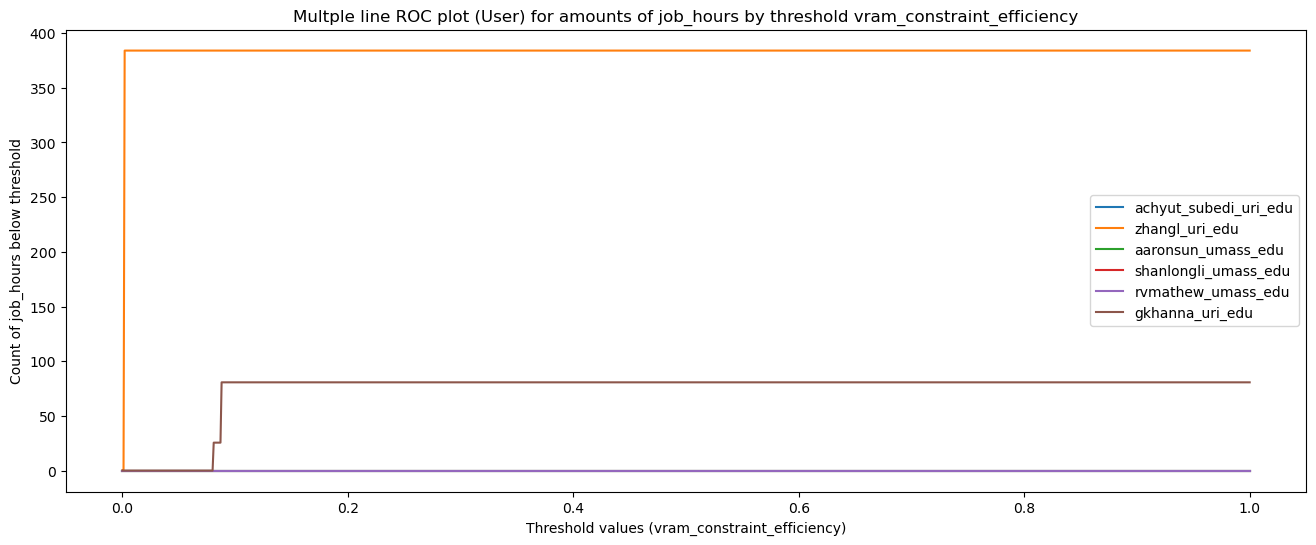

In [35]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=top_user_by_job_hour["User"].to_list(),
    object_column_type=ProportionMetricsEnum.USER,
    threshold_metric=JobEfficiencyMetricsEnum.VRAM_CONSTRAINT_EFFICIENCY,
    proportion_metric=ProportionMetricsEnum.JOB_HOURS,
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    plot_percentage=False,
)

[np.float64(6064.4800000000005), np.float64(6121.822222222222), np.float64(30409.172777777778), np.float64(37068.45888888889), np.float64(45198.683333333334), np.float64(45198.85888888889), np.float64(54447.06111111111), np.float64(58349.73277777778), np.float64(58349.73277777778), np.float64(58350.17055555555), np.float64(58350.17055555555), np.float64(58666.36111111111), np.float64(58952.02694444444), np.float64(59080.192777777775), np.float64(59080.192777777775), np.float64(59224.15083333333), np.float64(59224.15083333333), np.float64(59232.15194444444), np.float64(59232.15194444444), np.float64(60026.79194444444), np.float64(60026.79194444444), np.float64(60066.44861111111), np.float64(60103.22583333333), np.float64(60348.536944444444), np.float64(60348.536944444444), np.float64(60649.199166666665), np.float64(60657.700833333336), np.float64(60669.501388888886), np.float64(60669.501388888886), np.float64(60669.501388888886), np.float64(61916.158055555556), np.float64(61916.15805555

(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (User) for amounts of job_hours by threshold alloc_vram_efficiency'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Count of job_hours below threshold'>])

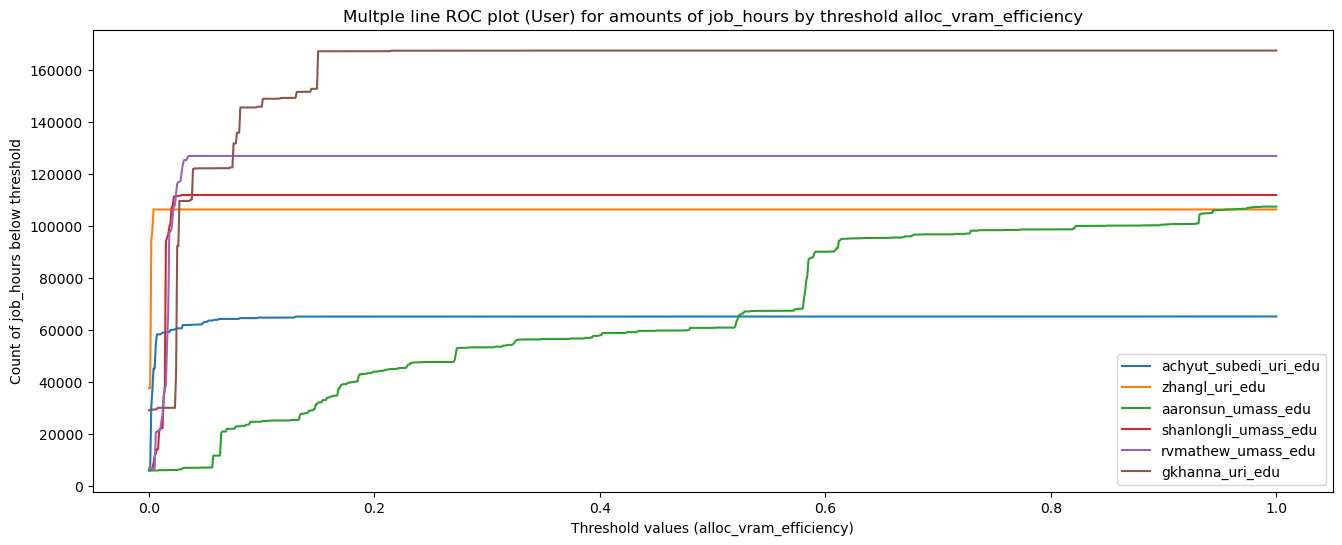

In [36]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=top_user_by_job_hour["User"].to_list(),
    object_column_type=ProportionMetricsEnum.USER,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY,
    proportion_metric=ProportionMetricsEnum.JOB_HOURS,
    min_threshold=0.0,
    max_threshold=1.0,
    threshold_step=0.001,
    plot_percentage=False,
)

### Multiple plot ROC by PI Group ###

In [37]:
# from src.analysis.roc_plot import ROCVisualizer

# roc_instance = ROCVisualizer(db_path="../data/slurm_data.db")

In [38]:
from src.config.enum_constants import ProportionMetricsEnum, JobEfficiencyMetricsEnum

cur_df = roc_instance.jobs_with_efficiency_metrics
top_pi_group_job_counts = (
    cur_df.groupby(ProportionMetricsEnum.PI_GROUP.value)
    .agg(job_count=("JobID", "count"), job_hours=("job_hours", "sum"))
    .reset_index()
    .sort_values(by="job_count")
    .tail(6)
)
top_pi_group_job_counts

/var/folders/fk/pzwkjjt962zdq9cqb2t9lz7m0000gn/T/ipykernel_16464/2120321704.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cur_df.groupby(ProportionMetricsEnum.PI_GROUP.value)


,Account,job_count,job_hours
74,pi_jianhanc_umass_edu,40921,151558.307778
282,pi_kandread_umass_edu,48235,19194.903333
32,pi_shertel_umass_edu,52347,6366.29
88,pi_pchien_umass_edu,54668,30981.09
117,pi_drsheldon_umass_edu,70304,14292.964722
156,pi_ekalogerakis_umass_edu,101806,42909.676944


[np.int64(2911), np.int64(2911), np.int64(2911), np.int64(2911), np.int64(3690), np.int64(4395), np.int64(4593), np.int64(4608), np.int64(4609), np.int64(6769), np.int64(6772), np.int64(6811), np.int64(6811), np.int64(11337), np.int64(15015), np.int64(40521), np.int64(40597), np.int64(40652), np.int64(40669), np.int64(40712), np.int64(40798), np.int64(40807), np.int64(40853), np.int64(40855), np.int64(40855), np.int64(40856), np.int64(40857), np.int64(40859), np.int64(40860), np.int64(40862), np.int64(40862), np.int64(40862), np.int64(40862), np.int64(40862), np.int64(40862), np.int64(40862), np.int64(40864), np.int64(40864), np.int64(40864), np.int64(40864), np.int64(40865), np.int64(40865), np.int64(40865), np.int64(40865), np.int64(40865), np.int64(40865), np.int64(40865), np.int64(40867), np.int64(40867), np.int64(40868), np.int64(40869), np.int64(40869), np.int64(40869), np.int64(40869), np.int64(40869), np.int64(40869), np.int64(40869), np.int64(40869), np.int64(40869), np.int64(

(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (Account) for amounts of jobs by threshold alloc_vram_efficiency'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Count of jobs below threshold'>])

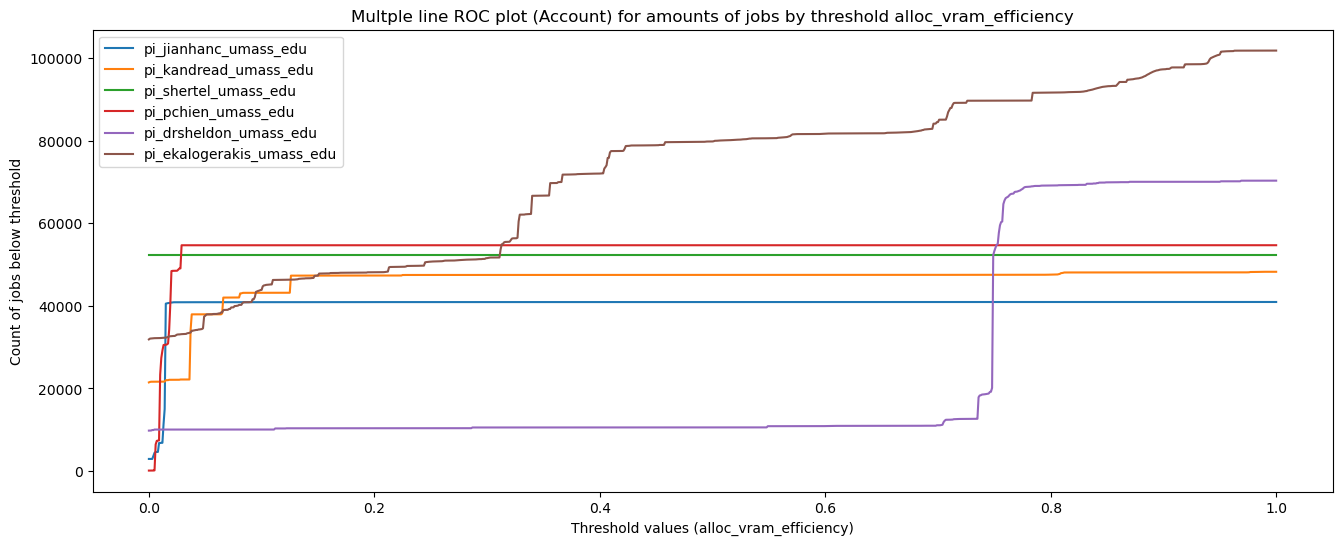

In [39]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_pi_group_job_counts[ProportionMetricsEnum.PI_GROUP.value].to_numpy()),
    object_column_type=ProportionMetricsEnum.PI_GROUP,
    max_threshold=1.0,
    min_threshold=0.0,
    threshold_step=0.001,
    plot_percentage=False,
)

Amount of entries whose alloc_vram_efficiency_score is -inf : 266359
[np.int64(19812), np.int64(19822), np.int64(19831), np.int64(19852), np.int64(19988), np.int64(20004), np.int64(20016), np.int64(20027), np.int64(20042), np.int64(20077), np.int64(20136), np.int64(20169), np.int64(20199), np.int64(20213), np.int64(20223), np.int64(20236), np.int64(20247), np.int64(20262), np.int64(20277), np.int64(20288), np.int64(20300), np.int64(20320), np.int64(20357), np.int64(20491), np.int64(20676), np.int64(20868), np.int64(21013), np.int64(21190), np.int64(21504), np.int64(21885), np.int64(22238), np.int64(22511), np.int64(22752), np.int64(22973), np.int64(23204), np.int64(23631), np.int64(24214), np.int64(24770), np.int64(25213), np.int64(25495), np.int64(25654), np.int64(25735), np.int64(25758), np.int64(25769), np.int64(25774), np.int64(25775), np.int64(25775), np.int64(25775), np.int64(25776), np.int64(25778), np.int64(25784), np.int64(25806), np.int64(25837), np.int64(25877), np.int64(259

(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ROC plot (Account) for amounts of jobs by threshold alloc_vram_efficiency_score'}, xlabel='Threshold values (alloc_vram_efficiency_score)', ylabel='Count of jobs below threshold'>])

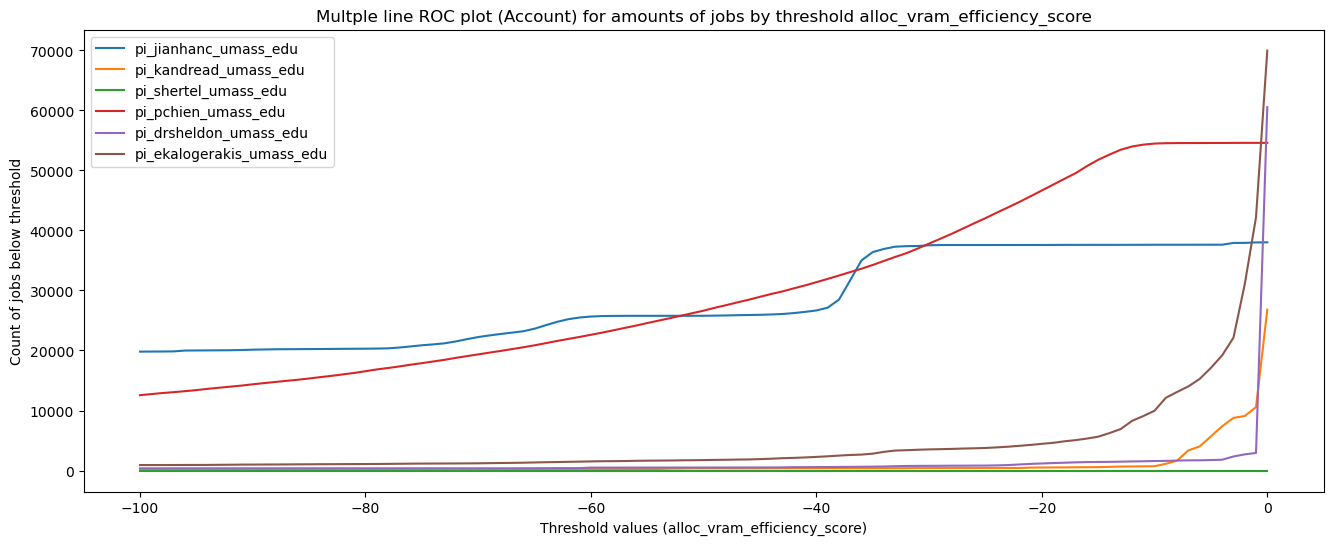

In [40]:
roc_instance.multiple_line_roc_plot(
    plot_object_list=list(top_pi_group_job_counts[ProportionMetricsEnum.PI_GROUP.value].to_numpy()),
    object_column_type=ProportionMetricsEnum.PI_GROUP,
    threshold_metric=JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY_SCORE,
    max_threshold=0.0,
    min_threshold=-100.0,
    threshold_step=1.0,
    plot_percentage=False,
)